In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/winequalityN.csv')

In [4]:
df.shape

(6497, 13)

In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.shape

(6463, 13)

In [9]:
df['type'].value_counts(normalize = True)

white    0.75352
red      0.24648
Name: type, dtype: float64

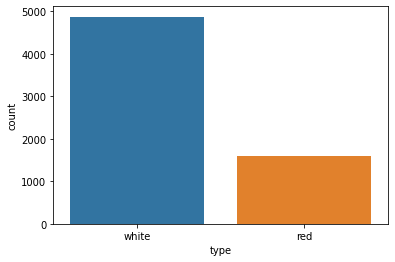

In [10]:
sns.countplot(x = 'type',data=df)

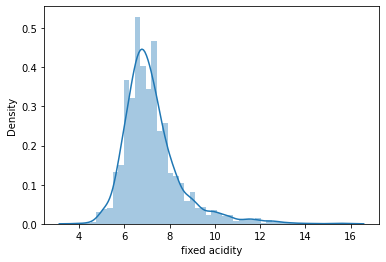

In [11]:
plt.figure(2)
plt.subplot()
sns.distplot(df['fixed acidity'])

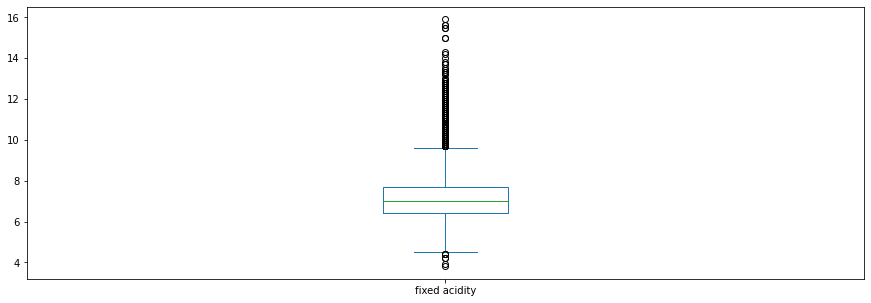

In [12]:
plt.subplot()
df['fixed acidity'].plot.box(figsize=(15,5))

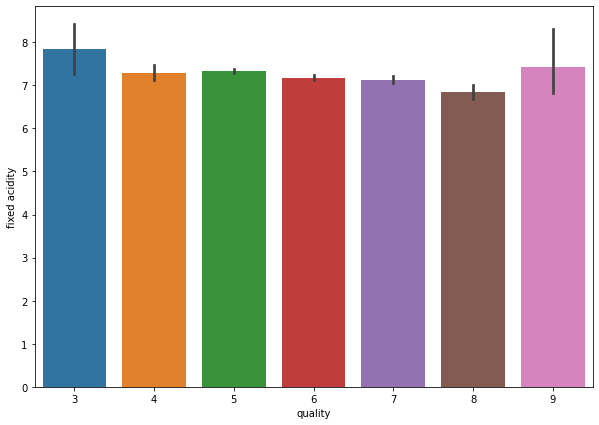

In [13]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y = 'fixed acidity',data=df)

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


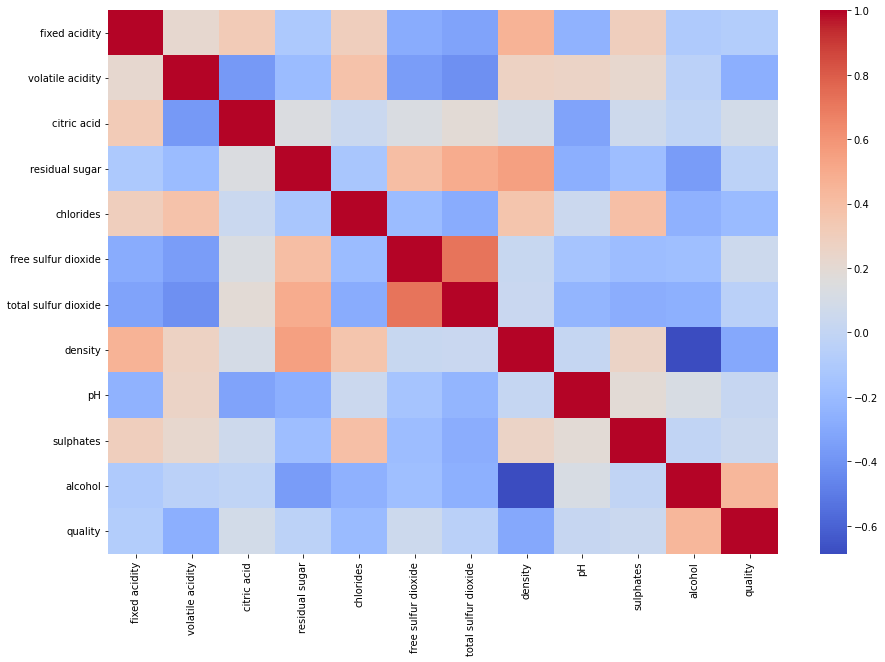

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap = 'coolwarm')

In [16]:
# Remove negative correlated values
df_new = df.drop(['total sulfur dioxide'],axis=1)
df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [17]:
df_after_map = pd.get_dummies(df_new,drop_first=True)
df_after_map

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


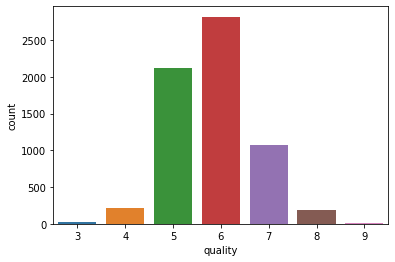

In [18]:
sns.countplot(df['quality'])

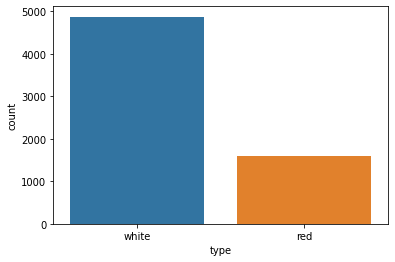

In [19]:
sns.countplot(df['type'])

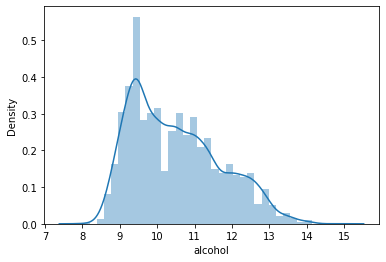

In [20]:
sns.distplot(df['alcohol'])

In [22]:
# find skew
from scipy.stats import skew
skew(df['alcohol'])

0.5653039979634944